In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('./wine_data.csv')

In [3]:
df.head()

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Standardization

In [4]:
X = df.drop(['class_label'], axis=1)
y = df['class_label']

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

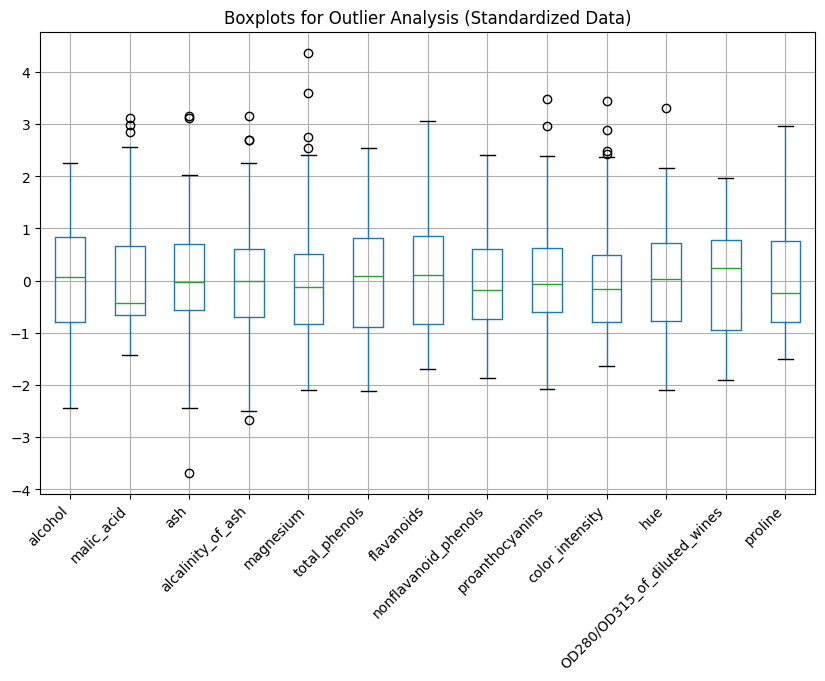

In [5]:
plt.figure(figsize=(10, 6))
X_standardized_df.boxplot()
plt.xticks(rotation=45, ha='right')
plt.title('Boxplots for Outlier Analysis (Standardized Data)')
plt.show()

### Covariance Matrix

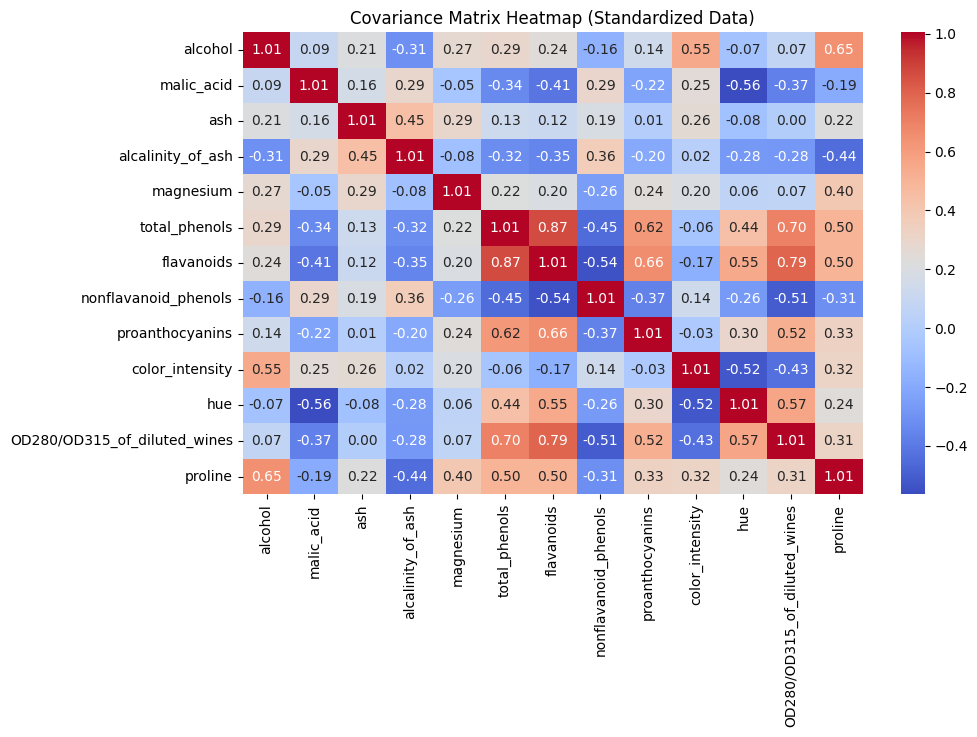

In [6]:
cov_matrix_standardized = pd.DataFrame(X_standardized, columns=X.columns).cov()

plt.figure(figsize=(10, 6))
sns.heatmap(cov_matrix_standardized, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Covariance Matrix Heatmap (Standardized Data)')
plt.show()

### PCA without specifying components

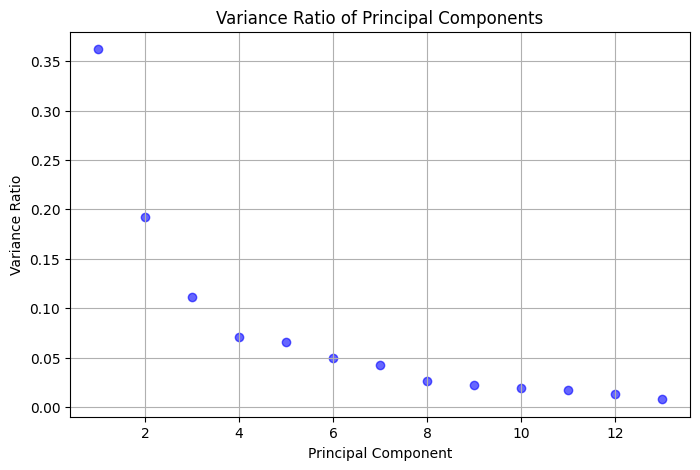

In [13]:
pca = PCA(n_components=None)
pca.fit(X_standardized)

plt.figure(figsize=(8, 5))
plt.scatter(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, label='Variance Ratio', color='blue', alpha=0.6)
# plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Variance Ratio of Principal Components')
plt.grid()
plt.show()

### PCA with 2 components

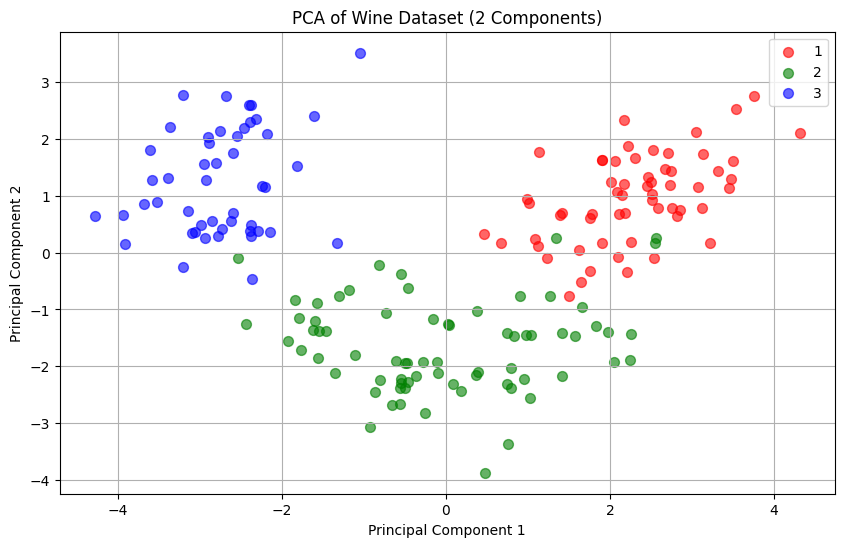

In [11]:
pca_2d = PCA(n_components=2)
principal_components = pca_2d.fit_transform(X_standardized)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_df, y.reset_index(drop=True)], axis=1)

plt.figure(figsize=(10, 6))

colors = ['red', 'green', 'blue']
for label, color in zip(df['class_label'].unique(), colors):
    indices_to_keep = final_df['class_label'] == label
    plt.scatter(final_df.loc[indices_to_keep, 'PC1'], 
                final_df.loc[indices_to_keep, 'PC2'], 
                c=color, s=50, label=label, alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset (2 Components)')
plt.legend()
plt.grid()
plt.show()